# DATA PREPROCESSING

## Importing the libraries

In [1]:
import tensorflow as tf
import pandas as pd
from scipy.stats import chi2_contingency
from datetime import datetime
import category_encoders as ce
import warnings
warnings.filterwarnings('ignore')

In [2]:
print(tf.__version__)

2.14.0


## Importing the dataset

In [3]:
# Dataset with all columns
dataset = pd.read_csv("Dataset/credit_card.csv")
dataset

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339602,2020-12-31 23:57:56,Schmidt-Larkin,home,12.68,Wales,AK,64.7556,-165.6723,145,"Administrator, education",1939-11-09,a8310343c189e4a5b6316050d2d6b014,65.623593,-165.186033,0
339603,2020-12-31 23:58:04,"Pouros, Walker and Spence",kids_pets,13.02,Greenview,CA,41.5403,-122.9366,308,Call centre manager,1958-09-20,bd7071fd5c9510a5594ee196368ac80e,41.973127,-123.553032,0
339604,2020-12-31 23:59:07,Reilly and Sons,health_fitness,43.77,Luray,MO,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,39.946837,-91.333331,0
339605,2020-12-31 23:59:15,Rau-Robel,kids_pets,86.88,Burbank,WA,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,46.658340,-119.715054,0


## Data Exploration and Understanding

In [4]:
# Explore the data types of the columns
dataset.dtypes

trans_date_trans_time     object
merchant                  object
category                  object
amt                      float64
city                      object
state                     object
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [5]:
dataset.describe()

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud
count,339607.000000,339607.000000,339607.000000,3.396070e+05,339607.000000,339607.000000,339607.000000
mean,70.577984,39.718991,-110.622605,1.071409e+05,39.718853,-110.622383,0.005247
std,161.675242,5.094961,12.651370,2.930299e+05,5.130894,12.663998,0.072248
min,1.000000,20.027100,-165.672300,4.600000e+01,19.027422,-166.671575,0.000000
25%,9.600000,36.715400,-120.093600,4.710000e+02,36.817194,-119.823755,0.000000
50%,46.460000,39.617100,-111.098500,1.645000e+03,39.586209,-111.036443,0.000000
75%,83.350000,41.710000,-100.621500,3.543900e+04,42.193072,-100.353096,0.000000
max,28948.900000,66.693300,-89.628700,2.383912e+06,67.510267,-88.629203,1.000000


In [6]:
#To gets the columns that are most correlated with the class column
corr = dataset.corr(numeric_only=True)['is_fraud'].sort_values
corr


<bound method Series.sort_values of amt           0.201023
lat           0.009239
long         -0.004494
city_pop      0.002338
merch_lat     0.008848
merch_long   -0.004550
is_fraud      1.000000
Name: is_fraud, dtype: float64>

The 'amt' feature appears to have a positive correlation with 'is_fraud,' suggesting that higher transaction amounts might be associated with a higher likelihood of fraud.

The 'city_pop' feature has a very weak correlation with 'is_fraud,' suggesting it may not be a strong predictor.

In [7]:


# Select the categorical columns with 'object' data type
categorical_columns = dataset.select_dtypes(include=['object']).columns

# Create a dictionary to store chi-square statistics and p-values
chi2_results = {}

# Perform Chi-Square test for each categorical column
for col in categorical_columns:
    contingency_table = pd.crosstab(dataset[col], dataset['is_fraud'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results[col] = {'Chi-Square': chi2, 'p-value': p}

# Create a DataFrame from the results
chi2_results_df = pd.DataFrame(chi2_results).T

# Sort by p-value (smaller p-values indicate stronger association)
chi2_results_df.sort_values(by='p-value', ascending=True, inplace=True)

# Print the results
print(chi2_results_df)

                          Chi-Square        p-value
city                    31570.202091   0.000000e+00
job                     29197.252678   0.000000e+00
dob                     37423.425681   0.000000e+00
category                 1417.008486  3.323232e-295
merchant                 2144.122007  4.166961e-148
state                     130.571299   4.739550e-22
trans_date_trans_time  338808.743360   3.548401e-01
trans_num              339607.000000   4.991932e-01


Columns like 'city,' 'job,' 'dob,' 'category,' 'state,' and 'merchant' have very low p-values close to zero, indicating a strong association with the target variable ('isFraud').

The 'trans_date_trans_time' column has a p-value of approximately 0.354, indicating that it may not be strongly associated with the target variable.

The 'trans_num' column has a p-value of approximately 0.499, indicating no significant association with the target variable.

In [8]:
# To explore a particular column
dataset['merchant'].describe()

count          339607
unique            693
top       Kilback LLC
freq             1149
Name: merchant, dtype: object

In [9]:
# To explore a particular column
dataset['category'].describe()

count            339607
unique               14
top       gas_transport
freq              35089
Name: category, dtype: object

In [10]:
# To explore a particular column
dataset['city'].describe()

count      339607
unique        176
top       Phoenix
freq         7297
Name: city, dtype: object

In [11]:
# To explore a particular column
dataset['state'].describe()

count     339607
unique        13
top           CA
freq       80495
Name: state, dtype: object

In [12]:
# To explore a particular column
dataset['job'].describe()

count                 339607
unique                   163
top       Surveyor, minerals
freq                    6589
Name: job, dtype: object

In [13]:
# To explore a particular column
dataset['trans_date_trans_time'].describe()

count                  339607
unique                 338504
top       2019-12-09 17:30:34
freq                        3
Name: trans_date_trans_time, dtype: object

In [14]:
# To explore a particular column
dataset['dob'].describe()

count         339607
unique           187
top       1987-04-23
freq            4386
Name: dob, dtype: object

In [15]:
# It returns the unique values in the column as an array.
pd.unique(dataset['category'].values)

array(['grocery_pos', 'entertainment', 'shopping_pos', 'misc_pos',
       'shopping_net', 'gas_transport', 'misc_net', 'grocery_net',
       'food_dining', 'health_fitness', 'kids_pets', 'home',
       'personal_care', 'travel'], dtype=object)

## Data Cleaning

### (1) Removing irrelevant columns

In [16]:
# List of columns we want to keep
desired_columns = [ 'merchant', 'category', 'amt', 'state', 'city', 'job', 'dob', 'is_fraud']

# Filter the DataFrame to keep only the desired columns
filtered = dataset[desired_columns]

# 'filtered' now contains only the specified columns, and the rest are removed
filtered

,merchant,category,amt,state,city,job,dob,is_fraud
0,"Heller, Gutmann and Zieme",grocery_pos,107.23,WA,Orient,Special educational needs teacher,1978-06-21,0
1,Lind-Buckridge,entertainment,220.11,ID,Malad City,Nature conservation officer,1962-01-19,0
2,Kiehn Inc,grocery_pos,96.29,CA,Grenada,Systems analyst,1945-12-21,0
3,Beier-Hyatt,shopping_pos,7.77,NM,High Rolls Mountain Park,Naval architect,1967-08-30,0
4,Bruen-Yost,misc_pos,6.85,WY,Freedom,"Education officer, museum",1967-08-02,0
...,...,...,...,...,...,...,...,...
339602,Schmidt-Larkin,home,12.68,AK,Wales,"Administrator, education",1939-11-09,0
339603,"Pouros, Walker and Spence",kids_pets,13.02,CA,Greenview,Call centre manager,1958-09-20,0
339604,Reilly and Sons,health_fitness,43.77,MO,Luray,Town planner,1966-02-13,0
339605,Rau-Robel,kids_pets,86.88,WA,Burbank,Musician,1981-11-29,0


In [17]:
# filtered = dataset.drop(['city_pop',lat', 'long', 'trans_num', 'merch_long', 'merch_lat'], axis=1)
# filtered

### (2) Handling missing data

In [18]:
# Use the “info()” function to have an idea about null columns.
filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339607 entries, 0 to 339606
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   merchant  339607 non-null  object 
 1   category  339607 non-null  object 
 2   amt       339607 non-null  float64
 3   state     339607 non-null  object 
 4   city      339607 non-null  object 
 5   job       339607 non-null  object 
 6   dob       339607 non-null  object 
 7   is_fraud  339607 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 20.7+ MB


In [19]:
# Check the null values count in the filtered dataset.
filtered.isnull().sum()

merchant    0
category    0
amt         0
state       0
city        0
job         0
dob         0
is_fraud    0
dtype: int64

### (3) Handling duplicate data 

In [20]:
# Check for duplicate rows
duplicate_rows = filtered[filtered.duplicated()]

# Print the duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
                           merchant      category    amt state          city  \
13089                   Zboncak LLC   food_dining  13.03    NE        Hooper   
27773    Swaniawski, Lowe and Robel  shopping_pos   7.99    CA      Glendale   
41045            Altenwerth-Kilback          home  56.85    WY  Rock Springs   
47672              Denesik and Sons  shopping_pos   5.05    CA  Laguna Hills   
49780   Monahan, Bogisich and Ledne      misc_pos   3.66    NE        Hooper   
...                             ...           ...    ...   ...           ...   
336394     Schuppe, Nolan and Hoege  shopping_pos   6.34    CO      Meredith   
338401                    Price Inc  shopping_net   1.05    UT      Thompson   
338630                Stracke-Lemke   grocery_pos  90.32    MO    Centerview   
339378                Ankunding LLC  shopping_net   5.73    MO   Rocky Mount   
339415  Gutmann, McLaughlin and Wiz          home  24.04    WA        Colton   

                       

In [21]:
# Handle duplicates
filtered.drop_duplicates(inplace=False)

,merchant,category,amt,state,city,job,dob,is_fraud
0,"Heller, Gutmann and Zieme",grocery_pos,107.23,WA,Orient,Special educational needs teacher,1978-06-21,0
1,Lind-Buckridge,entertainment,220.11,ID,Malad City,Nature conservation officer,1962-01-19,0
2,Kiehn Inc,grocery_pos,96.29,CA,Grenada,Systems analyst,1945-12-21,0
3,Beier-Hyatt,shopping_pos,7.77,NM,High Rolls Mountain Park,Naval architect,1967-08-30,0
4,Bruen-Yost,misc_pos,6.85,WY,Freedom,"Education officer, museum",1967-08-02,0
...,...,...,...,...,...,...,...,...
339602,Schmidt-Larkin,home,12.68,AK,Wales,"Administrator, education",1939-11-09,0
339603,"Pouros, Walker and Spence",kids_pets,13.02,CA,Greenview,Call centre manager,1958-09-20,0
339604,Reilly and Sons,health_fitness,43.77,MO,Luray,Town planner,1966-02-13,0
339605,Rau-Robel,kids_pets,86.88,WA,Burbank,Musician,1981-11-29,0


## Feature Engineering

### (1) Converting 'dob' from object data type to numeric data type

In [22]:
# Assuming 'dob' column contains date of birth in a valid date format
filtered['dob'] = pd.to_datetime(filtered['dob'])

# Calculate age based on the current date
current_date = datetime.now()
filtered.loc[:, 'age'] = (current_date - filtered['dob']).dt.days // 365  # Calculate age in years

# 'age' column now contains the age of individuals as numeric values
print(filtered)


                         merchant        category     amt state  \
0       Heller, Gutmann and Zieme     grocery_pos  107.23    WA   
1                  Lind-Buckridge   entertainment  220.11    ID   
2                       Kiehn Inc     grocery_pos   96.29    CA   
3                     Beier-Hyatt    shopping_pos    7.77    NM   
4                      Bruen-Yost        misc_pos    6.85    WY   
...                           ...             ...     ...   ...   
339602             Schmidt-Larkin            home   12.68    AK   
339603  Pouros, Walker and Spence       kids_pets   13.02    CA   
339604            Reilly and Sons  health_fitness   43.77    MO   
339605                  Rau-Robel       kids_pets   86.88    WA   
339606            Breitenberg LLC          travel    7.99    ID   

                            city                                job  \
0                         Orient  Special educational needs teacher   
1                     Malad City        Nature conser

In [25]:
filtered['age'].describe()

count    339607.000000
mean         51.058306
std          17.004381
min          22.000000
25%          38.000000
50%          49.000000
75%          62.000000
max          96.000000
Name: age, dtype: float64

In [26]:
# List of columns we want to keep
desired_columns = [  'merchant', 'category', 'job', 'age', 'state', 'city','amt', 'is_fraud']

# Filter the DataFrame to keep only the desired columns
filtered = filtered[desired_columns]

# 'filtered_df' now contains only the specified columns, and the rest are removed
filtered

,merchant,category,job,age,state,city,amt,is_fraud
0,"Heller, Gutmann and Zieme",grocery_pos,Special educational needs teacher,45,WA,Orient,107.23,0
1,Lind-Buckridge,entertainment,Nature conservation officer,61,ID,Malad City,220.11,0
2,Kiehn Inc,grocery_pos,Systems analyst,77,CA,Grenada,96.29,0
3,Beier-Hyatt,shopping_pos,Naval architect,56,NM,High Rolls Mountain Park,7.77,0
4,Bruen-Yost,misc_pos,"Education officer, museum",56,WY,Freedom,6.85,0
...,...,...,...,...,...,...,...,...
339602,Schmidt-Larkin,home,"Administrator, education",83,AK,Wales,12.68,0
339603,"Pouros, Walker and Spence",kids_pets,Call centre manager,65,CA,Greenview,13.02,0
339604,Reilly and Sons,health_fitness,Town planner,57,MO,Luray,43.77,0
339605,Rau-Robel,kids_pets,Musician,41,WA,Burbank,86.88,0


### (2)  Encode categorical variables

In [27]:
# Encode categorical variables (using binary encoding)

categorical_columns = ['city', 'state', 'job', 'merchant', 'category']
encoder = ce.BinaryEncoder(cols=categorical_columns)
data = encoder.fit_transform(filtered)
data

,merchant_0,merchant_1,merchant_2,merchant_3,merchant_4,merchant_5,merchant_6,merchant_7,merchant_8,merchant_9,...,city_0,city_1,city_2,city_3,city_4,city_5,city_6,city_7,amt,is_fraud
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,107.23,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,220.11,0
2,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,1,96.29,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,7.77,0
4,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,6.85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339602,0,0,1,1,0,1,0,0,0,0,...,0,0,1,0,1,0,1,1,12.68,0
339603,0,0,1,1,1,1,1,0,0,0,...,0,0,1,0,1,1,0,1,13.02,0
339604,1,0,0,0,0,1,0,1,1,1,...,0,1,1,0,1,1,0,1,43.77,0
339605,0,1,0,0,1,1,1,0,1,0,...,0,1,1,1,1,0,1,1,86.88,0


In [28]:
data.dtypes

merchant_0      int64
merchant_1      int64
merchant_2      int64
merchant_3      int64
merchant_4      int64
merchant_5      int64
merchant_6      int64
merchant_7      int64
merchant_8      int64
merchant_9      int64
category_0      int64
category_1      int64
category_2      int64
category_3      int64
job_0           int64
job_1           int64
job_2           int64
job_3           int64
job_4           int64
job_5           int64
job_6           int64
job_7           int64
age             int64
state_0         int64
state_1         int64
state_2         int64
state_3         int64
city_0          int64
city_1          int64
city_2          int64
city_3          int64
city_4          int64
city_5          int64
city_6          int64
city_7          int64
amt           float64
is_fraud        int64
dtype: object

## Formatting data

In [29]:
# Create a dictionary with the mapping of old column names to new column names
column_mapping = {'amt': 'amount'}

# Use the 'rename()' method to rename the columns
data.rename(columns=column_mapping, inplace=True)

# 'data' now has the columns with the new names
data

,merchant_0,merchant_1,merchant_2,merchant_3,merchant_4,merchant_5,merchant_6,merchant_7,merchant_8,merchant_9,...,city_0,city_1,city_2,city_3,city_4,city_5,city_6,city_7,amount,is_fraud
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,107.23,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,220.11,0
2,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,1,96.29,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,7.77,0
4,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,6.85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339602,0,0,1,1,0,1,0,0,0,0,...,0,0,1,0,1,0,1,1,12.68,0
339603,0,0,1,1,1,1,1,0,0,0,...,0,0,1,0,1,1,0,1,13.02,0
339604,1,0,0,0,0,1,0,1,1,1,...,0,1,1,0,1,1,0,1,43.77,0
339605,0,1,0,0,1,1,1,0,1,0,...,0,1,1,1,1,0,1,1,86.88,0


In [30]:
#Save to a csv
#data.to_csv("cleaned_dataset.csv",index=False)

## Feature Selection

In [31]:
X = data.drop(columns=['is_fraud']) #feature variables
y = data['is_fraud'] #target variables


## Handling Class Imbalance (using oversampling)

In [32]:
#from imblearn.over_sampling import RandomOverSampler

#oversampler = RandomOverSampler(sampling_strategy='minority')
#X_resampled, y_resampled = oversampler.fit_resample(X, y)


# IMPLEMENTATION OF THE MODELS

## Train-Test Split 

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 1. Random Forest Model

In [34]:
#Model Instantiation Without Tuning Any Parameters
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [35]:
# Create a Random Forest classifier with default parameters
rf_classifier = RandomForestClassifier(random_state=42)

In [36]:
#Model Training
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
#Model Evaluation (Overfitting Check)
# Predict on training and testing sets
y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

In [38]:
# Calculate accuracy on training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

Training Accuracy: 1.00
Testing Accuracy: 1.00


In [39]:
#Hyperparameter Tuning (GridSearchCV)

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None,10],
    'min_samples_split': [2,5],
    'min_samples_leaf': [1,2]
}


In [40]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

In [41]:
# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1)


In [42]:
# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]})

In [43]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print('Best Hyperparameters:')
print(best_params)

Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [44]:
#Model Refitting with Best Hyperparameters
best_rf_classifier = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)
best_rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [45]:
# Accuracy Calculation
# Calculate accuracy on training and testing sets with tuned hyperparameters
best_train_accuracy = accuracy_score(y_train, best_rf_classifier.predict(X_train))
best_test_accuracy = accuracy_score(y_test, best_rf_classifier.predict(X_test))

print(f'Best Training Accuracy: {best_train_accuracy:.2f}')
print(f'Best Testing Accuracy: {best_test_accuracy:.2f}')

Best Training Accuracy: 1.00
Best Testing Accuracy: 1.00


In [46]:
#Confusion Matrix Calculation

# Calculate confusion matrix on the testing set
conf_matrix = confusion_matrix(y_test, best_rf_classifier.predict(X_test))
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[67536    19]
 [  229   138]]


In [47]:
# F1 Score Calculation

#Calculate F1 score on the testing set
f1_score_value = f1_score(y_test, best_rf_classifier.predict(X_test))
print(f'F1 Score: {f1_score_value:.2f}')

F1 Score: 0.53


In [48]:

print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67555
           1       0.88      0.38      0.53       367

    accuracy                           1.00     67922
   macro avg       0.94      0.69      0.76     67922
weighted avg       1.00      1.00      1.00     67922



## 2. Naive Bayes Model

In [49]:
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV




In [50]:
# Create a Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

In [51]:
# Train the classifier on the training data
naive_bayes_classifier.fit(X_train, y_train)

GaussianNB()

In [52]:
#The accuracy of the model was computed by calculating the training set score and the testing set score
# Calculate the training set accuracy
training_accuracy = naive_bayes_classifier.score(X_train, y_train)
print(f'Training Set Accuracy: {training_accuracy:.3f}')

# Calculate the testing set accuracy
testing_accuracy = naive_bayes_classifier.score(X_test, y_test)
print(f'Testing Set Accuracy: {testing_accuracy:.3f}')

Training Set Accuracy: 0.990
Testing Set Accuracy: 0.990


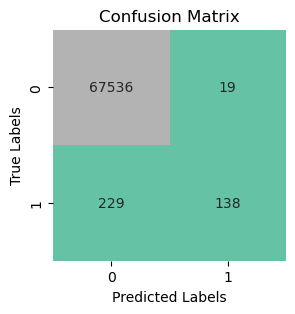

In [53]:
# Assuming you have predictions and true labels for your testing set
# y_test contains the true labels, and y_test_pred contains the predicted labels

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Define a custom color palette for the heatmap
# You can choose any palette you prefer
color_palette = sns.color_palette("Set2")

# Create a heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=color_palette, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [54]:
# Make predictions on the test data
y_pred = naive_bayes_classifier.predict(X_test)

In [55]:
# Evaluate the classifier's performance
classification_report_result = classification_report(y_test, y_pred)

In [56]:
# Print the classification report
print(classification_report_result)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     67555
           1       0.27      0.50      0.35       367

    accuracy                           0.99     67922
   macro avg       0.63      0.75      0.67     67922
weighted avg       0.99      0.99      0.99     67922



In [57]:
# Perform K-fold cross-validation (replace 'X' and 'y' with your feature matrix and target variable)
cv_scores = cross_val_score(naive_bayes_classifier, X, y, cv=5)  # 'cv' specifies the number of folds (e.g., 5-fold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean and standard deviation of the scores
mean_score = cv_scores.mean()
std_deviation = cv_scores.std()
print(f"Mean score: {mean_score:.2f}")
print(f"Standard deviation: {std_deviation:.2f}")


Cross-validation scores: [0.99072465 0.99097494 0.9895614  0.98937    0.98767686]
Mean score: 0.99
Standard deviation: 0.00


In [58]:
# Define the range of values for var_smoothing in a logarithmic scale
# The example below creates values from 1e-9 to 1e-1 with 10 values.
var_smoothing_values = np.logspace(-9, -1, 10)

# Print the values to see the range
print(var_smoothing_values)

[1.00000000e-09 7.74263683e-09 5.99484250e-08 4.64158883e-07
 3.59381366e-06 2.78255940e-05 2.15443469e-04 1.66810054e-03
 1.29154967e-02 1.00000000e-01]


In [59]:
# Define the number of splits and repeats (e.g., 5 splits, 3 repeats)
n_splits = 5
n_repeats = 3

# Create the Repeated Stratified K-Fold cross-validator
cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)




In [60]:
# Define the hyperparameter grid to search
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Create the Repeated Stratified K-Fold cross-validator
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

# Create the GridSearchCV object
grid_search_1 = GridSearchCV(estimator=naive_bayes_classifier, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to your data
grid_search_1.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search_1.best_params_
print('Best Hyperparameters:')
print(best_params)


Best Hyperparameters:
{'var_smoothing': 1e-05}


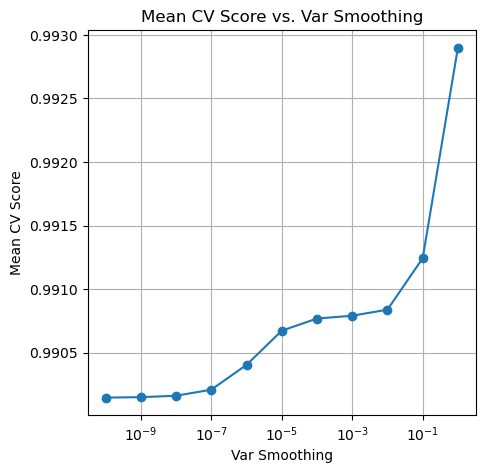

Best Var Smoothing: 1.0


GaussianNB(var_smoothing=1.0)

In [61]:
# Define a range of values for the hyperparameter (var_smoothing in this case)
hyperparameter_values = np.logspace(-10, 0, 11)  # Example values from 1e-10 to 1

# Create an empty list to store mean CV scores
mean_cv_scores = []

# Iterate over the hyperparameter values and compute mean CV scores
for var_smoothing in hyperparameter_values:
    # Create a Gaussian Naive Bayes classifier with the current var_smoothing value
    classifier = GaussianNB(var_smoothing=var_smoothing)
    
    # Perform k-fold cross-validation (e.g., k=5)
    cv_scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy')
    
    # Calculate the mean CV score for this hyperparameter value
    mean_score = np.mean(cv_scores)
    
    # Append the mean CV score to the list
    mean_cv_scores.append(mean_score)

# Find the index of the hyperparameter value with the highest mean CV score
best_index = np.argmax(mean_cv_scores)
best_var_smoothing = hyperparameter_values[best_index]

# Plot the mean CV scores against the hyperparameter values
plt.figure(figsize=(5, 5))
plt.semilogx(hyperparameter_values, mean_cv_scores, marker='o', linestyle='-')
plt.xlabel('Var Smoothing')
plt.ylabel('Mean CV Score')
plt.title('Mean CV Score vs. Var Smoothing')
plt.grid(True)
plt.show()

# Print the best hyperparameter value
print(f'Best Var Smoothing: {best_var_smoothing}')

# Now you can use the best_var_smoothing to train your final Gaussian Naive Bayes model
final_classifier = GaussianNB(var_smoothing=best_var_smoothing)
final_classifier.fit(X_train, y_train)


In [62]:
# Create and train the Gaussian Naive Bayes model with tuned hyperparameters
gnb = GaussianNB(var_smoothing=1)  # Replace with your best var_smoothing value
gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[67308   247]
 [  234   133]]


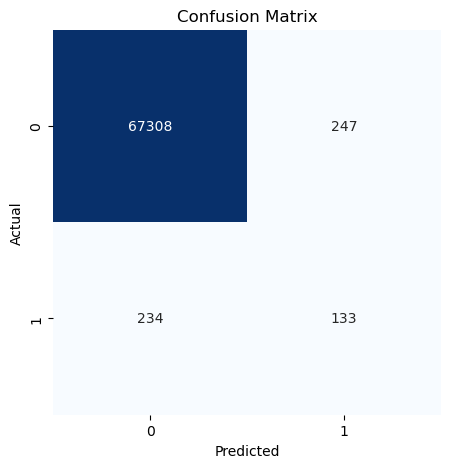

In [63]:
# Assuming 'conf_matrix' is your confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [64]:
# Compute the classification report
class_report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67555
           1       0.35      0.36      0.36       367

    accuracy                           0.99     67922
   macro avg       0.67      0.68      0.68     67922
weighted avg       0.99      0.99      0.99     67922



## 3. Logistics Regression

In [65]:
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)
from sklearn.metrics import accuracy_score,classification_report,roc_curve,auc, confusion_matrix
import pickle
from sklearn import metrics
from sklearn.model_selection import cross_val_score


### no parameter tuning

In [66]:
model = LogisticRegression(solver='liblinear' , random_state=0)

In [67]:
model.fit(X_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [68]:
y_pred = model.predict(X_test)

In [69]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy_percentage = 100 * accuracy
accuracy_percentage

99.41697829863668

In [70]:
print(f'Training score: {model.score(X_train,y_train)}')
print(f'Test scor: {model.score(X_test,y_test)}')

Training score: 0.9944016047996761
Test scor: 0.9941697829863667


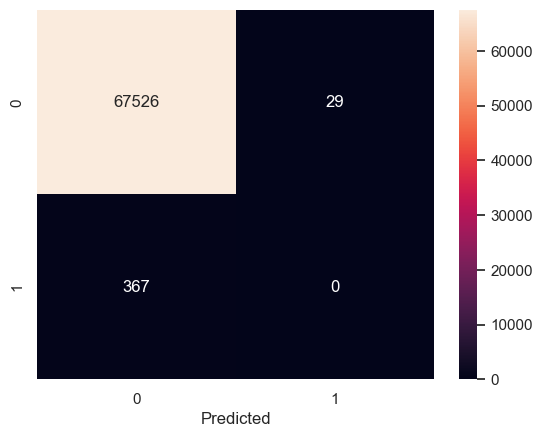

In [71]:
sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True,fmt="g") 
plt.xlabel("Predicted")
plt.show("Actual")
plt.show()

In [72]:
print(classification_report(y,model.predict(X)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    337825
           1       0.01      0.00      0.00      1782

    accuracy                           0.99    339607
   macro avg       0.50      0.50      0.50    339607
weighted avg       0.99      0.99      0.99    339607



### Applying 5-fold cross-validation

In [73]:
scores = cross_val_score(model, X_train,y_train, cv=5,scoring='accuracy')
print(f'Cross-validation scores: {scores}')
print(f'Average cross-validation score: {scores.mean()}')

Cross-validation scores: [0.99409242 0.99442369 0.99442369 0.99444209 0.99451571]
Average cross-validation score: 0.9943795204004638


In [74]:
parameters = [{'penalty':['none','elasticnet','l1','l2']},
             {'C':[0.001,0.01,1,10,100]},
             {'solver':['liblinear','newton-cg','lbfgs','sag','saga']}]

grid_search = GridSearchCV(estimator = model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 5,
                          verbose = 0)

In [75]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['none', 'elasticnet', 'l1', 'l2']},
                         {'C': [0.001, 0.01, 1, 10, 100]},
                         {'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                     'saga']}],
             scoring='accuracy')

In [76]:
#best score achieved during the GridSearchCV
print(f'GridSearchCV best score: {grid_search.best_score_}')

#print parameters that give the best results
print(f'Paramters that give the best results: {grid_search.best_params_}')

#print estimator that was chosen by the GridSearch
print(f'Estimator that was chosen by the search: {grid_search.best_estimator_}')

GridSearchCV best score: 0.9944347313984945
Paramters that give the best results: {'solver': 'saga'}
Estimator that was chosen by the search: LogisticRegression(random_state=0, solver='saga')


In [77]:
print(f'Training score: {grid_search.score(X_train, y_train)}')
print(f'Test score: {grid_search.score(X_test,y_test)}')

Training score: 0.9944347313984946
Test score: 0.9942286740673125


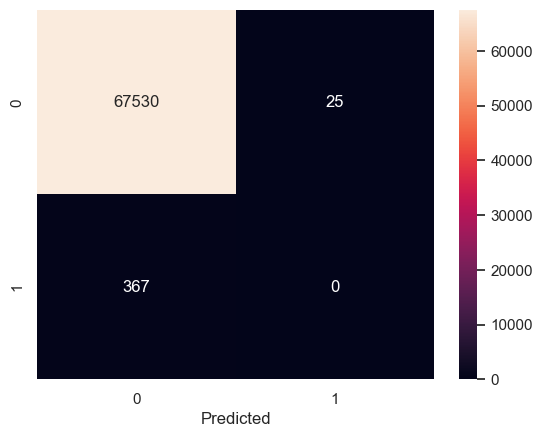

In [78]:
sns.heatmap(confusion_matrix(y_test,grid_search.predict(X_test)),annot=True, fmt="g")
plt.rcParams['figure.figsize'] = (6, 4) 
plt.xlabel("Predicted")
plt.show("Actual")
plt.show()

In [79]:
print(classification_report(y,grid_search.predict(X)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    337825
           1       0.00      0.00      0.00      1782

    accuracy                           0.99    339607
   macro avg       0.50      0.50      0.50    339607
weighted avg       0.99      0.99      0.99    339607



In [80]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

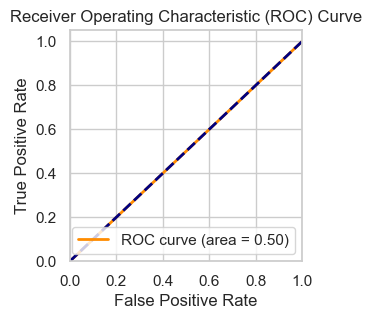

In [81]:
# Plot ROC curve
plt.figure(figsize=(3, 3)) 
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [82]:
# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print('Specificity:', specificity)

Specificity: 0.9995707201539487
